Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

# Model lib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Categorical encoding

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score

from imblearn.over_sampling import SMOTE

In [57]:
data=pd.read_csv(r'C:\Users\Ankit Ghai\Documents\PycharmProjects\pythonProject\Banking Churn Analysis\src\Data\Churn_Modelling.csv')

In [58]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking the Dimension of data

In [59]:
print("Total number of records in the datasets {}".format(data.shape[0]))
print("Total number of columns in the datasets {}".format(data.shape[1]))

Total number of records in the datasets 10000
Total number of columns in the datasets 14


In [60]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There is total **10000 records** and **14 columns** availabe in the dataset. * **Out of 14 columns** there are **11 numerical columns** and **3 categorical columns.**

In [62]:
data.isnull().sum().to_frame().rename(columns={0:"Total Number of missing value in columns"})

,Total Number of missing value in columns
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


None of the columns is having missing values.So we don't have to perform Data Imputation.

In [63]:
# Checking for the duplicated records
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


1) There is no duplicate records , hence no overfitting and thus no data leakage

Performing Descriptive Statistical Analysis on Categorical Columns

In [64]:
data.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


Surname column is having very high cardinality and not relevant for predicting customer churned or not. So we can simply drop this feature.
Geography & Gender Columns are having low cardinality and seems relevant for predicting customer churned or not.

Data wrangling, also known as data munging, refers to the process of cleaning, transforming, and preparing raw data for analysis.
It involves handling missing values, addressing inconsistencies and formatting data before it can be used for further analysis.

In [65]:
# Looking at random sample of data
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4840,4841,15691647,McGregor,411,France,Female,35,2,0.00,2,1,1,93825.78,0
4125,4126,15633378,Davidson,692,Spain,Female,49,9,0.00,2,1,0,178342.63,0
3279,3280,15670615,Castiglione,652,Spain,Male,37,7,0.00,2,1,0,68789.93,0
9712,9713,15701768,Tung,637,France,Male,32,3,0.00,2,1,1,197827.06,0
4639,4640,15567078,Kovaleva,789,France,Female,27,8,66201.96,1,1,1,79458.12,0


RowNumber and CustomerId columns represents a unique value for each customer and doesn't seem relevant for predicting customer churned or not.
Surname column is having high cardinality* and doesn't seems relevant for predicting customer churned or not.**
So we can simply drop these features.

In [66]:
data.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [67]:
data.shape[1]

11

In [68]:
# Renaming the Target column name and its value to make it relevent per project objective
data.rename(columns={"Exited":"Churned"},inplace=True)
data['Churned'].replace({0:"No",1:"Yes"},inplace=True)

In [69]:
data.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
1833,663,Germany,Male,32,8,130627.66,1,1,0,47161.25,Yes


* We have **converted raw data** into **well-structured data** to better analysis. * So we can perform **Expolatory Data Analysis** and **derive insights from the data.**

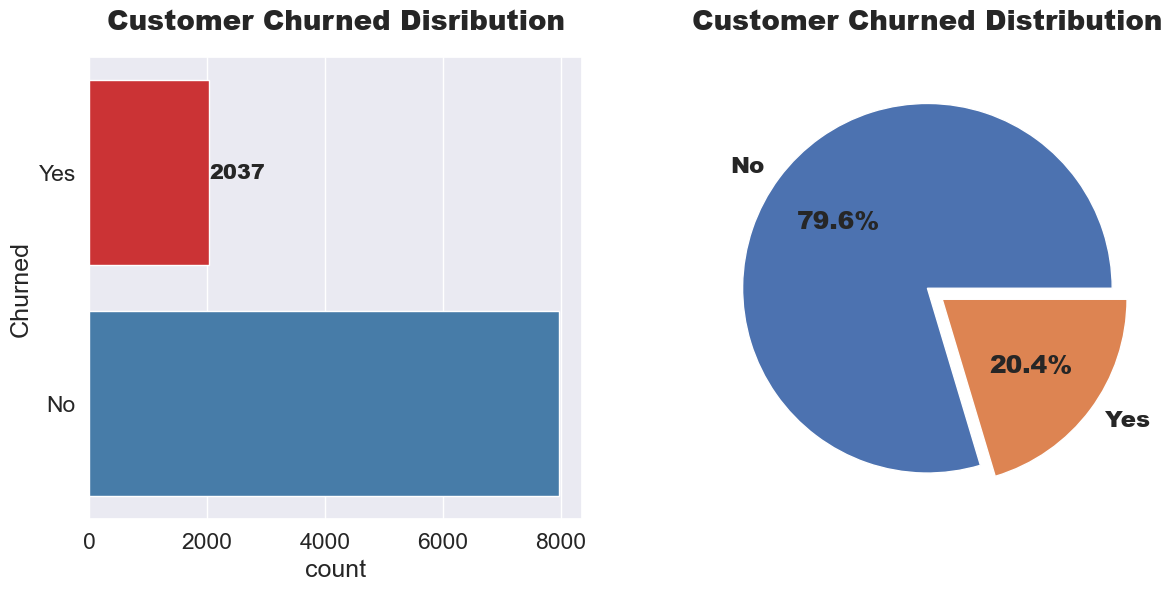

In [70]:
# Explorartory Data Analysis
# Visualaising Target variable
count=data['Churned'].value_counts()
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data['Churned'],palette="Set1")
ax.bar_label(ax.containers[0],fontweight="black",size=15)   
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)


plt.subplot(1,2,2)
plt.pie(count.values,labels=count.index,autopct="%1.1f%%",colors=sns.set_palette("Set2"),textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Distribution",fontweight="black",size=20,pad=20)
plt.show()




There is huge class-imbalance which can lead to bias in model performance.
So to overcome this class-imbalance we have to use over-sampling technique from SMOTE.

In [71]:
#Visualising the Customer churned based on Gender
def countplot(columns):
    plt.figure(figsize=(15,5))
    ax=sns.countplot(x=columns,data=data,palette="Set2",hue="Churned")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(data[columns]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
    plt.title("Customer churned by {}".format(columns),fontweight="black",size=20,pad=20)
    plt.show()

📊 Inference:
The churned probabillity is more for Feamle Customers compared to male customers.
Which means female customers are more deactivating their banking facilities compared to male customers.
📊 Recommendation:
Bank can Develop targeted marketing campaigns specifically tailored to female customers.
Bank can Focus on enhancing the overall customer experience for female customers.

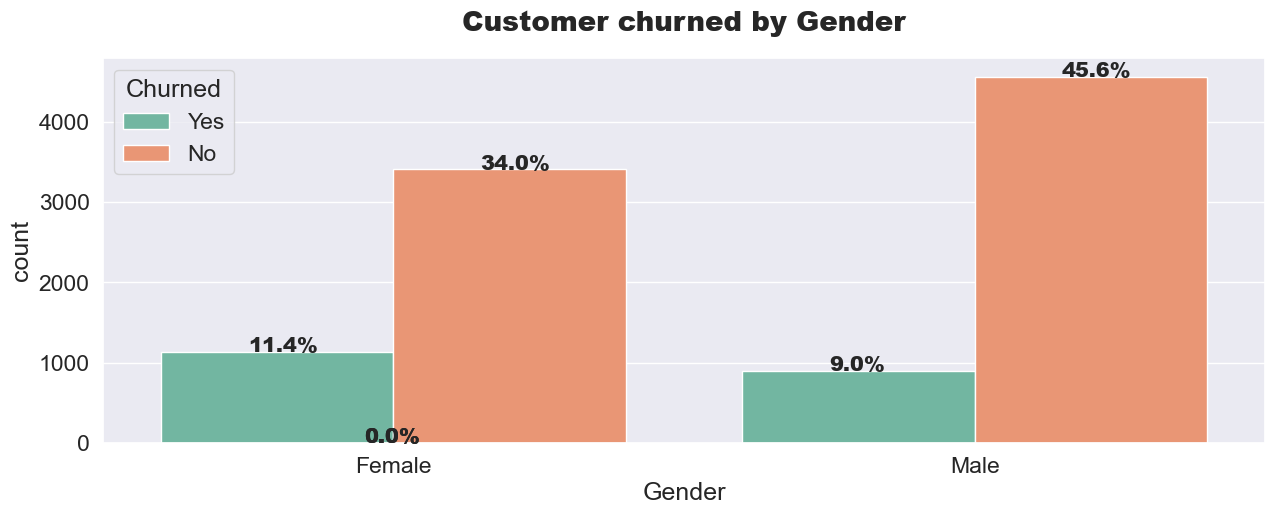

In [72]:
countplot("Gender")

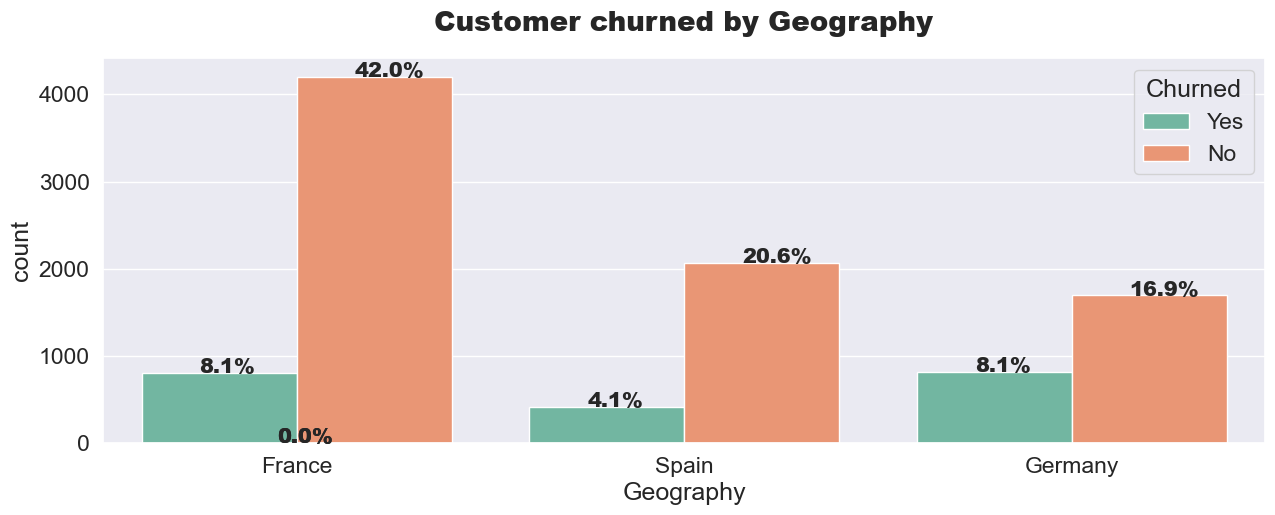

In [73]:
#Visualizing Customer Churned by Geoprahical Region.
countplot("Geography")

📊 Inference:
Half of the customers are from France followed by Germany and Spain.
Despite of the huge total customers difference between France & Germany the churned rate for France and Germany customers are same.
There are almost equal customers from Spain & Germany, but the Churn rate is almost double in Germany when compared with spain.
📊 Recommendation:
Bank can analyze the banking facilites & behaviour of customers from france and try to implement those on Germany customers.

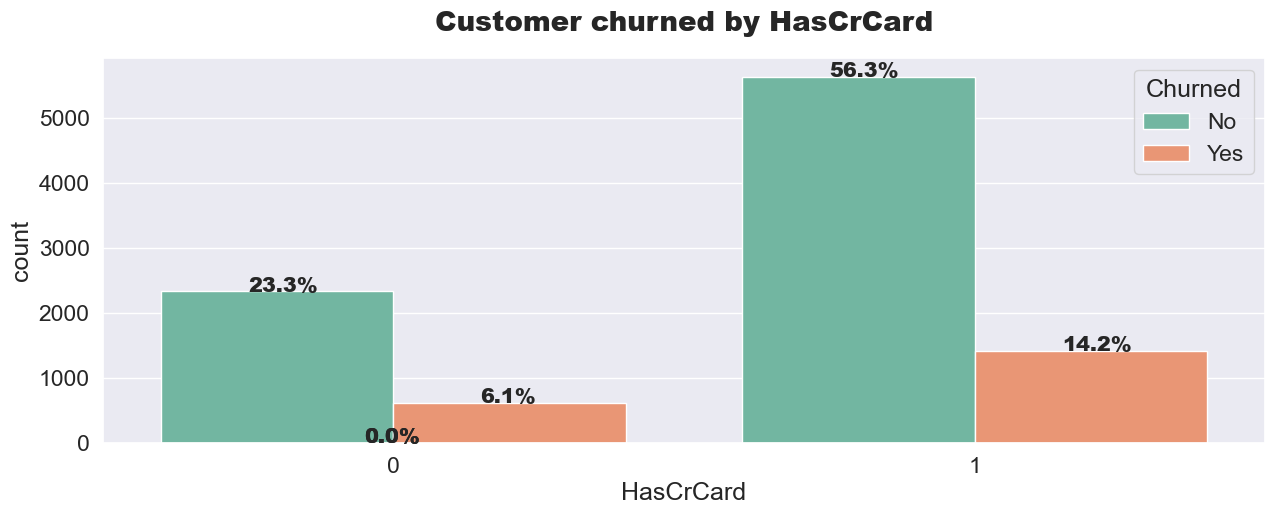

In [74]:
#Visualizing Customer Churn by "HasCrCard".
countplot("HasCrCard")

Inference:
More than 70% of customers are having credit card.
The churn probability value for the both the categories is almost 1:4.
So credit card is not affecting the churn of customers.

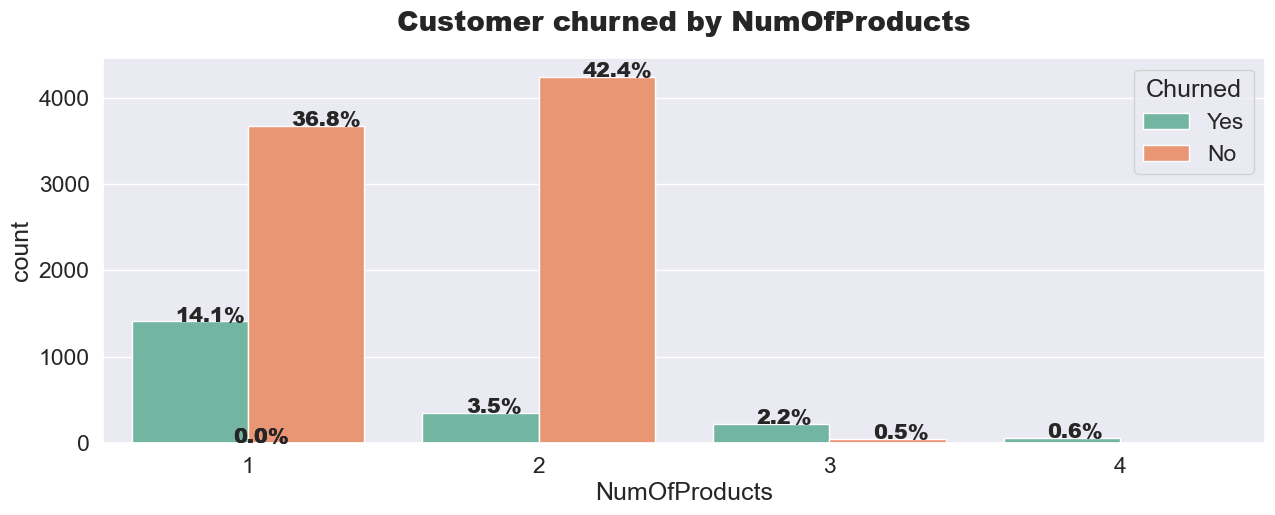

In [75]:
# Visualizing Customer Churned by "NumOfProducts".
countplot("NumOfProducts")

Inference:
Most of the customers are having either 1 or 2 total number of banking products.
Very few customers are having more than 2 total number of banking products.
The lowest churn rate is with customers having only 2 products.
There is very high churn rate in customers having 1 product or more than 2 products.
Note:
We can do feature engineering by grouping the customers having products more than 2 together to reduce the class imbalance.
Because Class Imbalance leads to bias in model and misrepresentation of minority class.
📊 Recommendation:
The bank can try to convince the customers to have atleast 2 banking products.
They can provide Rewards and Incentives to the customers having atleast 2 banking products.

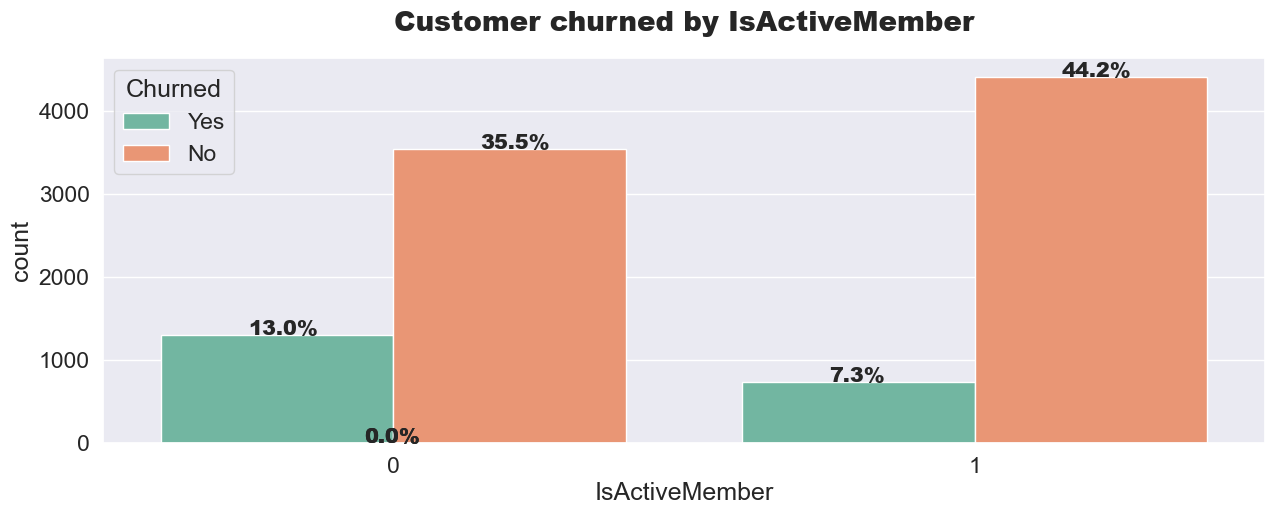

In [76]:
# Visualizing customer who is an active member of the bank
countplot("IsActiveMember")

 Inference:
There is approxiamately equal customer who are either active or not active.
But the churn rate % in not active customers is almost double compared to active customers.
So customers which are not active are morely likely to deactivate their banking facilities.
📊 Recommendation:
Bank can provide Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilities.

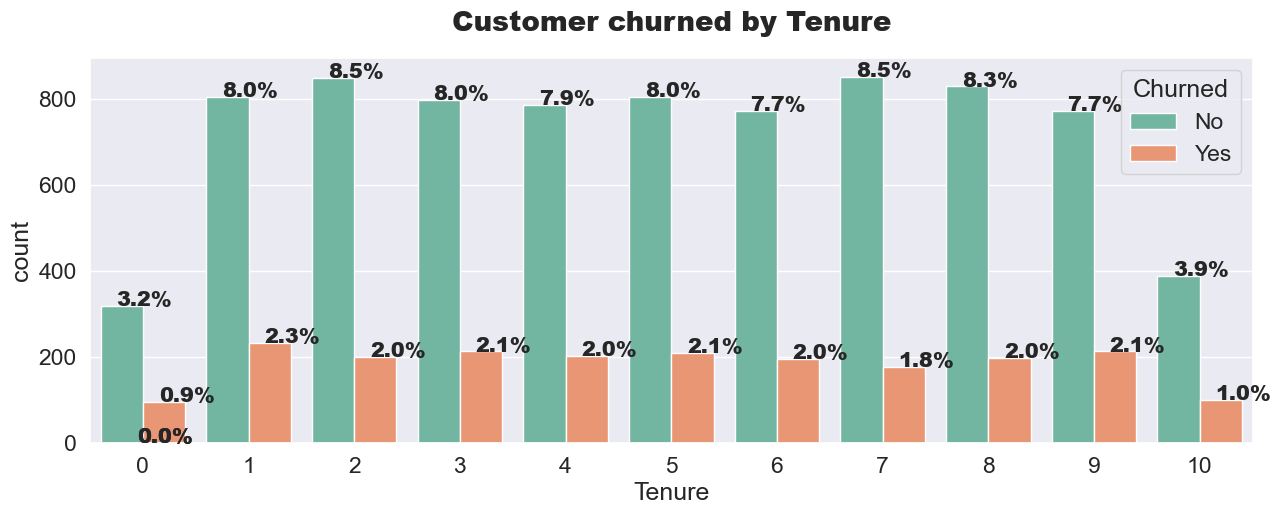

In [77]:
countplot("Tenure")

 Inference:
The highest tenure is 10 years which means that those customers have opened their account 10 years back.
Since there is almost similar distribution of churn status we can't make any specific inference.

In [78]:
# Visualizing Customer Churned by "CreditScore".
def continous_plot(columns):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=columns,data=data,hue="Churned",kde=True,palette="Set2")
    
    plt.subplot(1,2,2)
    sns.boxplot(data,x=data[columns],y=data['Churned'],palette="Set2")
    plt.title(f"Distribution of {columns} by Churn Status",fontweight="black",pad=20,size=15)
    plt.show()

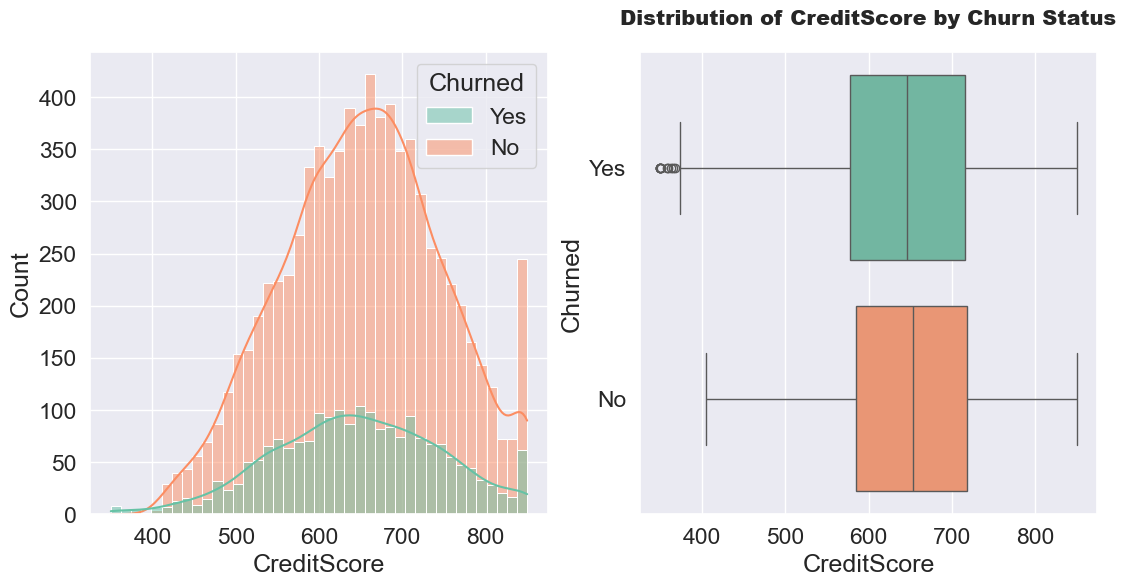

In [79]:
continous_plot("CreditScore")

The Median CreditScore of both churned and not churned customers are approxiamately equal.
Since the values are approximately equal for both churn status we can't generate any relevant inference.

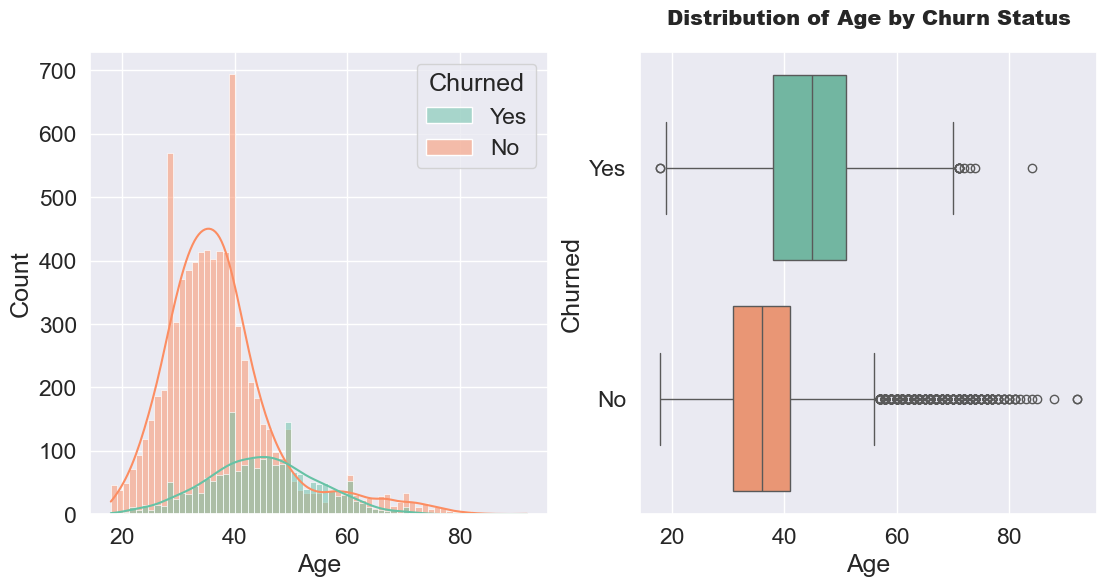

In [80]:
# Visualisation of churned customer by Age
continous_plot("Age")

Inference:
The distribution is right skewed because of presence of outliers which can lead to overfitting in model.
To overcome this right-skewed distribution we can use log normal transformation technique to bring a normal distribution.

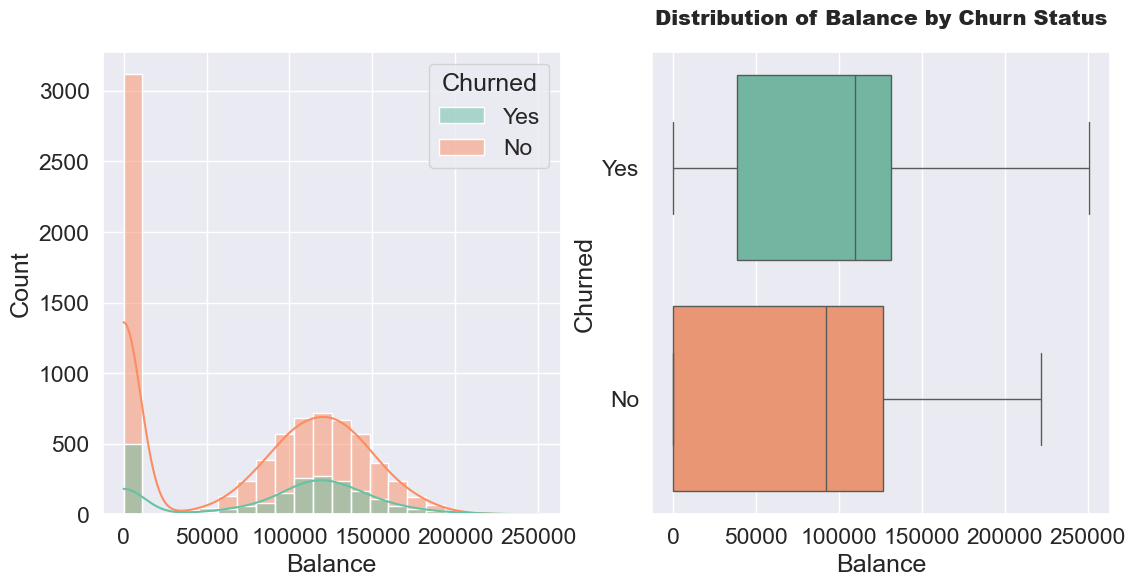

In [81]:
# Visualizing Customer Churned by "Balance."
continous_plot("Balance")

Inference:
More than 3000 customers are having their account balance equal to zero.
Customers with zero balance are more likely to deactivate their account.
Excluding the zero value we can observe a normal distribution. So don't have to use any other techniques.
Note:-
We can do Feature Engineering by grouping the customers with account balance equal to 0 and balance more than 0 separately.

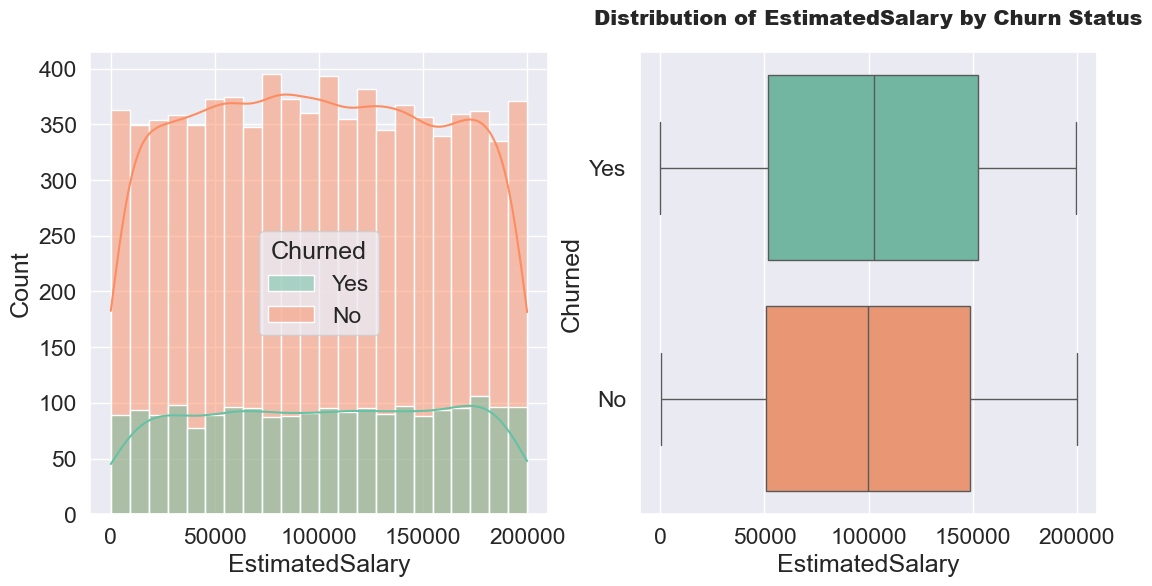

In [82]:
#Visualizing Customer Churned by "Estimated Salary".
continous_plot("EstimatedSalary")

The median value of EstimatedSalary is approxiamately same for both the churned categories.
Since the distribution is kind of similar for both churn category we can't make any relevant inference.

Feature Engineering

In [83]:
conditions = [(data['NumOfProducts']==1),(data['NumOfProducts']==2),(data['NumOfProducts']>2)]
values=["One product","Two Products","More Than 2 Products"]

data['Total_Products']=np.select(conditions,values,"Condition not met")

data.drop(columns=['NumOfProducts'],inplace=True)

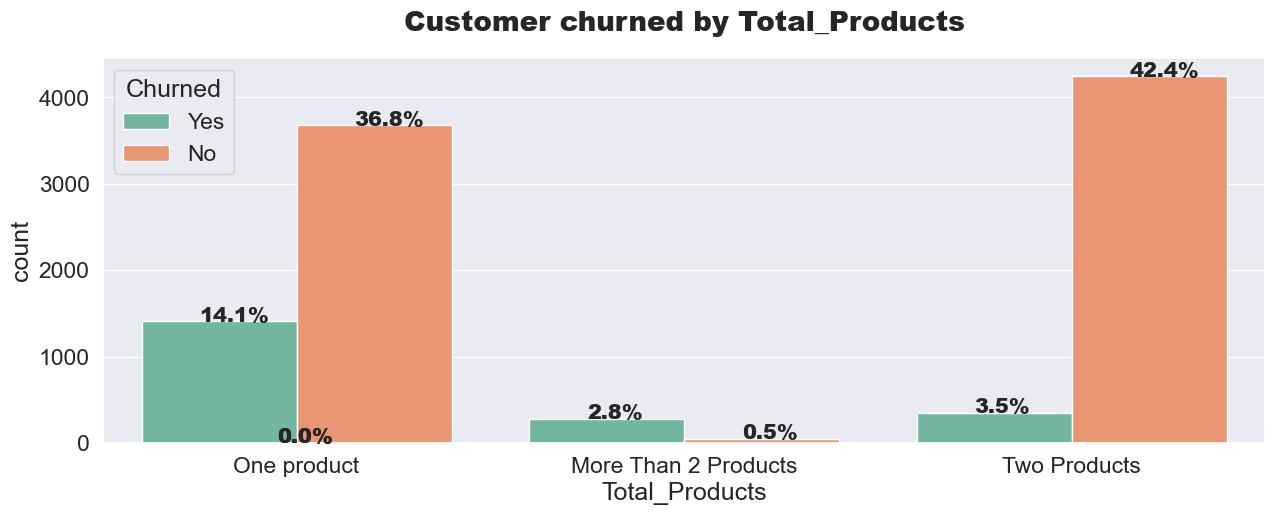

In [84]:
# Visualising New Plot Total product
countplot('Total_Products')

In [85]:
# Creating new feature w.r.t balance ==0 and balance >0
conditions=[(data['Balance']==0),(data['Balance']>0)]
values=["Zero Balance","More than Zero Balance"]
data['Account_Balance']=np.select(conditions,values,"Condition not met")

In [86]:
data.drop(columns=['Balance'],inplace=True)

In [87]:
data.sample()

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products,Account_Balance
5611,625,Germany,Male,42,6,1,0,93429.95,No,One product,More than Zero Balance


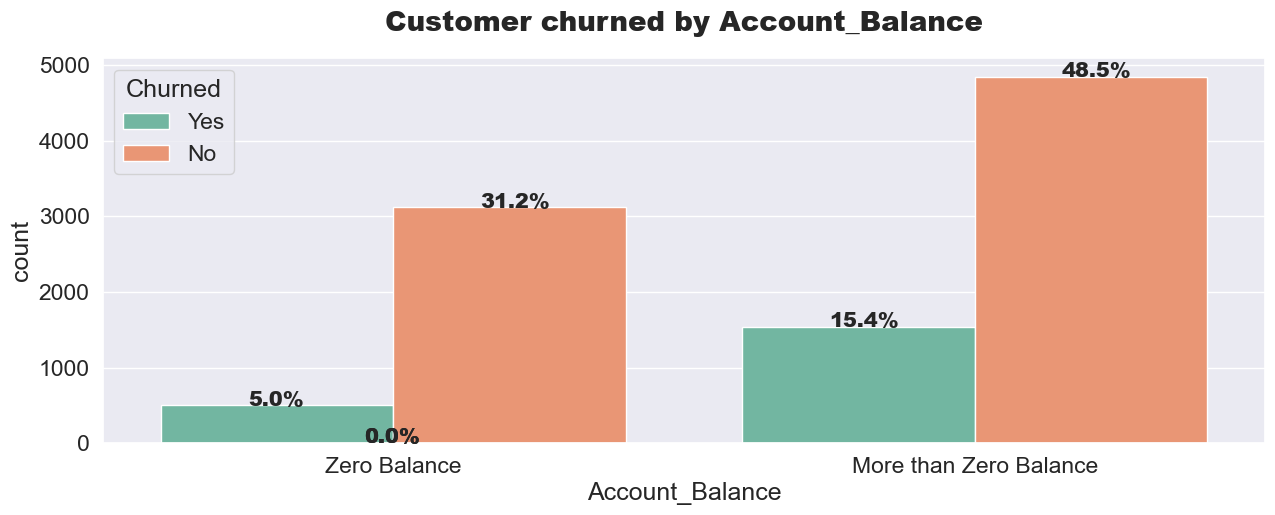

In [88]:
# Visualizing The New Feature "Account_Balance".¶
countplot('Account_Balance')

Data Preprocessing

In [89]:
data["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [90]:
cat_cols=[col for col in data.columns if data[col].dtype == 'object']
def card_check(cat_cols):
    for i in cat_cols:
        print("Cardinality of Categories columns {}:".format(i),data[i].unique())
        
card_check(cat_cols)

Cardinality of Categories columns Geography: ['France' 'Spain' 'Germany']
Cardinality of Categories columns Gender: ['Female' 'Male']
Cardinality of Categories columns Total_Products: ['One product' 'More Than 2 Products' 'Two Products']
Cardinality of Categories columns Account_Balance: ['Zero Balance' 'More than Zero Balance']


In [91]:
# Performing One hot encoding of the categorical columns
data=pd.get_dummies(data=data,columns=cat_cols,dtype=int)

In [92]:
data.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More than Zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0


In [93]:
#Checking Skewness of Continous Features.
cols=["CreditScore","Age","EstimatedSalary"]

In [94]:
data[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


 Inference:
Age Feature is highly right-skewed , which conveys that there is presence of positive outliers.This we have alreadu
seen in the EDA process above
Skewness can negatively impact the performance of certain machine learning algorithms, like DecisionTree & Linear Models.
To overcome the right-skewed distribution we can use log normal transformation to achieve a normal distribution

In [95]:
#Performing Log Transformation on Age Column.
Old_Age=data['Age']
data['Age']=np.log(data['Age'])

# Visualizing Age Before and After Transformation

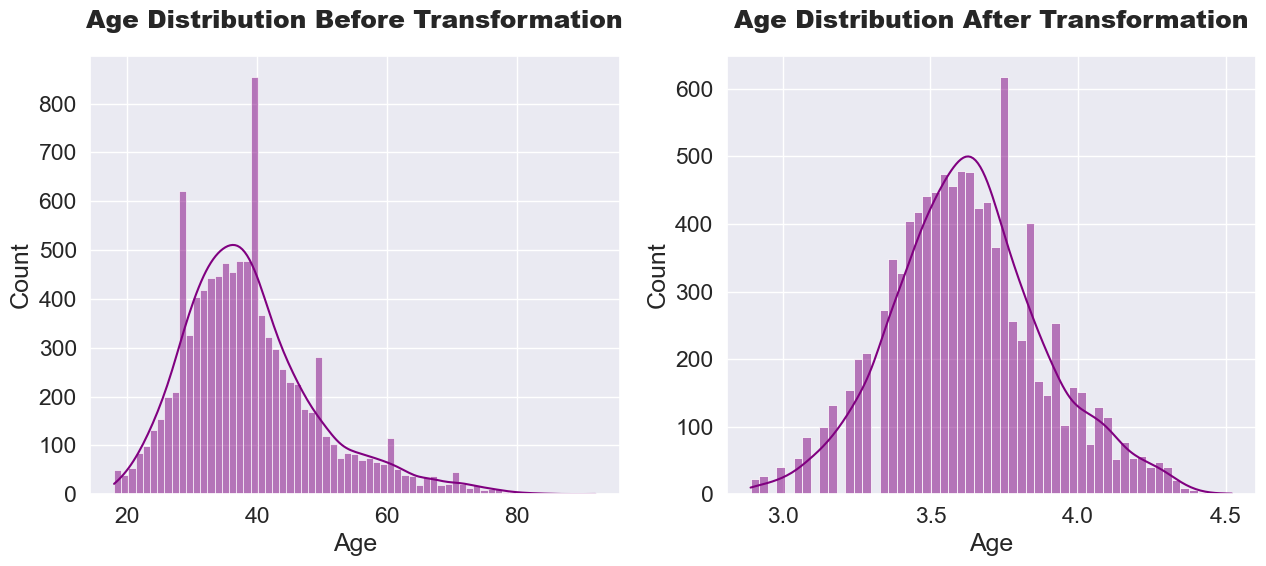

In [96]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns .histplot(Old_Age,color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(data['Age'],color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

After applying log normal transformation the age feature has achieved a normal distribution.
This will help model to find more relevant patterns and build a more accurate model.

In [97]:
#Splitting the X & Y from the dataset
X=data.drop(columns=['Churned'])
y=data['Churned']

In [98]:
#Spliting the data in Train and Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("Shape of x_train is :",X_train.shape)
print("Shape of x_test is :",X_test.shape)
print("Shape of y_train is :",y_train.shape)
print("Shape of y_test is :",y_test.shape)


Shape of x_train is : (8000, 16)
Shape of x_test is : (2000, 16)
Shape of y_train is : (8000,)
Shape of y_test is : (2000,)


📊 Inference:
* Data is **equally splitted** for **Model Training & Testing.** * So we can build a **Predictive Model** to find the **key factors** that are significantly influencing **customers churn.**

In [99]:
# Applying the SMOTE as there is class Imbalance
smt=SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smt.fit_resample(X_train,y_train)
print("Shape of X_train_resampled is : {}".format(X_train_resampled.shape))
print("Shape of y_train_resampled is : {}".format(y_train_resampled.shape))

Shape of X_train_resampled is : (12736, 16)
Shape of y_train_resampled is : (12736,)


In [100]:
y_train_resampled.value_counts().to_frame()

,count
Churned,
0,6368
1,6368


Inference:
Both the categories in Target variable are now having equal number of records.
So we can train the Model pn balanced records for both churn categories and make a predictive model with low bias.

    Model Creation using Decision Tree

#Performing Gris search with CV to find the best parameter of the DEcision Tree

In [101]:
dtree=DecisionTreeClassifier()

In [102]:
param_grid={"max_depth":[3,4,5,6,7,8,9,10],
            "min_samples_split":[2,3,4,5,6,7,8],
            "min_samples_leaf":[1,2,3,4,5,6,7,8],
            "criterion":["gini","entropy"],
            "splitter":["best","random"],
            "max_features":["auto",None],
            "random_state":[0,42]}

In [103]:
grid_search=GridSearchCV(dtree,param_grid=param_grid,cv=5,n_jobs=-1)
grid_search.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [104]:
# Fetching the best parameter of the model
best_parameter=grid_search.best_params_
print("Best parameters are:",best_parameter)

Best parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'random_state': 42, 'splitter': 'random'}


In [105]:
# Creating Decision Tree using the best Param
dtree=DecisionTreeClassifier(**best_parameter)
dtree.fit(X_train_resampled,y_train_resampled)


DecisionTreeClassifier(max_depth=8, min_samples_split=7, random_state=42,
                       splitter='random')

In [106]:
# Computing Model accuracy
y_train_pred=dtree.predict(X_train_resampled)
y_test_pred=dtree.predict(X_test)
print("Accuracy score of the model on Training data is : ",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy score of the model on Test data is :",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy score of the model on Training data is :  89.51 %
Accuracy score of the model on Test data is : 84.3 %


In [107]:
#Model Evaluation using different Metrics values
print("F1 Score of the model is :",round(f1_score(y_test,y_test_pred,average="micro")*100,2),"%")
print("Recall Score of the model is :",round(recall_score(y_test,y_test_pred,average="micro")*100,2),"%")
print("Precision Score of the model is :",round(precision_score(y_test,y_test_pred,average="micro")*100,2),"%")

F1 Score of the model is : 84.3 %
Recall Score of the model is : 84.3 %
Precision Score of the model is : 84.3 %


Inference:
We can observe that recall, precision, and F1 score are all the same, it means that our model is achieving perfect balance between correctly identifying positive samples (recall) and minimizing false positives (precision).
The high values for F1 score, recall score, and precision score, all of which are approximately 0.8. These metrics suggest that the model achieves good accuracy in predicting the positive class.

Finding Importance of Features in DecisionTreeClassifier

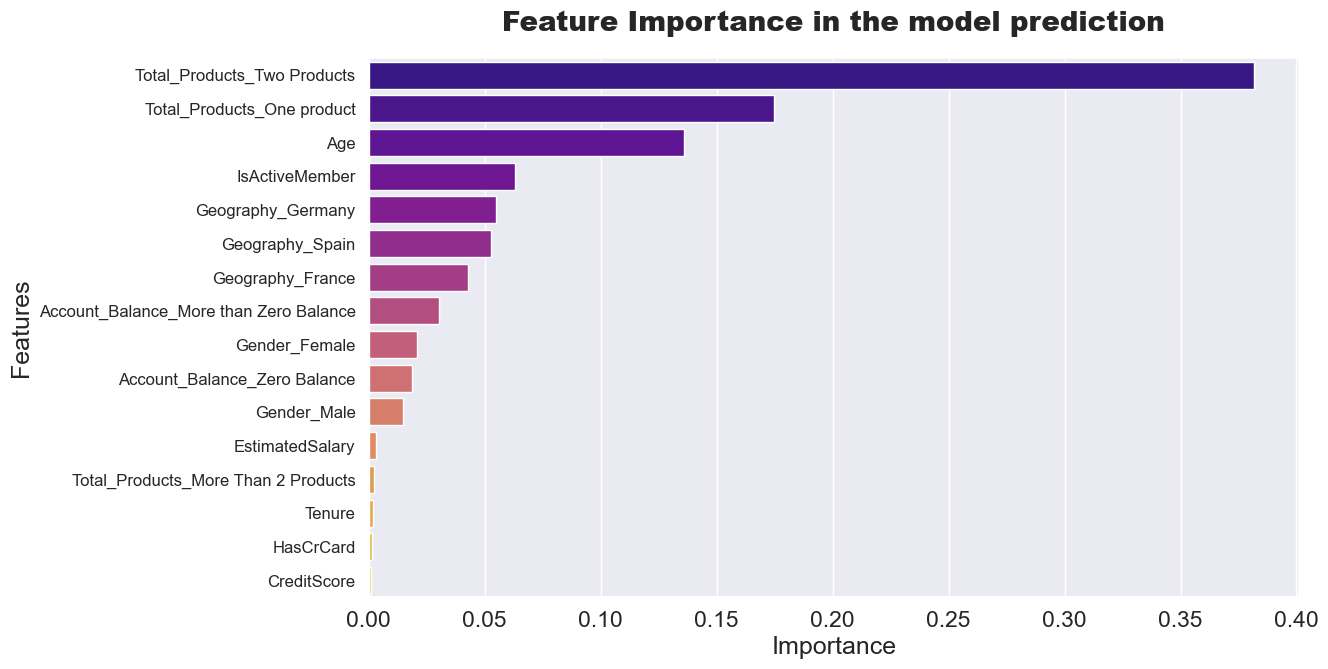

In [108]:
imp_df=pd.DataFrame({'Features':X_train.columns,
                     "Importance":dtree.feature_importances_})
features=imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x="Importance",y="Features",data=features,palette='plasma')
plt.title("Feature Importance in the model prediction",fontweight="black",size=20,pad=20)
plt.yticks(size=12)
plt.show()


Inference:
The key factors that significantly influence the deactivation of customers banking facilities are:-
Total_Products, Age, IsActiveMember, Geography, Balance and Gender.
The minimal impact of features on the deactivation of customers' banking facilities are:-
CreditScore, HasCrCard, Tenure and EstimatedSalary

In [109]:
#SHAP Summary Plot: Explaining Model Predictions with Feature Importance.Not able to understand
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)

plt.title("Feature Importance and Effects on Predictions",fontweight="black",pad=20,size=18)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns,plot_size=(14,8))

ModuleNotFoundError: No module named 'shap'

 Inference:
The red color represents high feature values, indicating that the feature positively contributes for increasing the prediction value.
The blue color represents low feature values, indicating that the feature negatively contributes for decreasing the prediction value.

In [ ]:
#Model Evaluation using Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred) 
plt.figure(figsize=(15,6))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap="Set1",fmt="g")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

📊 Inference:
* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome. * **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

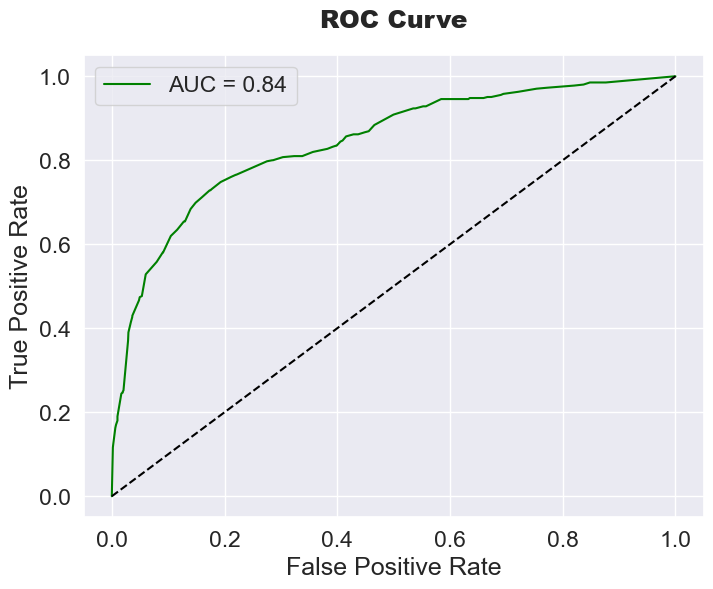

In [171]:
y_pred_prob=dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=["y_actual"])])
df_actual_predicted.index=y_test.index


fpr,tpr,thresholds=roc_curve(df_actual_predicted["y_actual"],y_pred_prob)
auc =roc_auc_score(df_actual_predicted['y_actual'],y_pred_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()


An AUC (Area Under the Curve) value of 0.86 suggests that the model has strong discriminative power.
This suggests that the model has a high ability to distinguish between positive and negative instances, indicating its effectiveness in making accurate predictions.
The model has a relatively high probability of ranking a randomly selected positive instance higher than a randomly selected negative instance.

Key-Points
The key factors that significantly influence the deactivation of customers banking facilities are Total_Products, Age, IsActiveMember, Gender and Geography.
High Training and Testing Accuracies: Both the model achieved a high accuracy score near to 90% on the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score near to 85% on the testing data suggests its ability to generalize well to unseen instances.
High F1 Score, Recall, and Precision: The model achieved high F1 score, recall, and precision values, all approximately 0.8. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.
High AUC value more than 0.8, states that the model demonstrates a reasonably good discriminatory power. It suggests that the model is able to distinguish between positive and negative instances with a relatively high degree of accuracy.
Overall Model Performance: The model demonstrates strong performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.
📊 Recommendations
The bank can try to convince the customers to have atleast 2 banking products but not less than 2.
The bank can launch a scheme for customers with higher ages (Senior Citizens) so that they not deactivate their banking facilities.
The bank can provide Rewards and Incentive Programs, Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilities.